In [1]:
%autosave 60
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
import sklearn.metrics
from sklearn.metrics import *
from sklearn.pipeline import make_pipeline

from torch.utils.data import Dataset, DataLoader
import math

import pickle

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

Autosaving every 60 seconds
Automatically created module for IPython interactive environment


In [2]:
DATA_DIR = "C:/Wasif/PD Motor Feature Extraction/TASK2_FEATURES_04_21/"
X_file = "x_repeat_removed_raw_pixels.npy"
y_file = "y_repeat_removed_raw_pixels.npy"
X_index_file = "index_repeat_removed.pickle"
SEED = 5543
TRAIN_TEST_SPLIT = [0.20, 0.80]
TRAIN_TEST_DEV_SPLIT = [0.70, 0.15, 0.15]
np.random.seed(seed=SEED)

In [3]:
class MyDataset(Dataset):
    
    def __init__(self):
        X = np.load(DATA_DIR+X_file)
        #scaler = StandardScaler()
        #self.X = scaler.fit_transform(X[:,:65536])
        self.X = X[:,:65536]
        self.y = np.load(DATA_DIR+y_file)
        self.n_samples = self.X.shape[0]
        
    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return (self.X[index], self.y[index])
    
    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

In [4]:
dataset = MyDataset()
n_train = (int)(TRAIN_TEST_SPLIT[0]*len(dataset))
n_test = len(dataset) - n_train
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [n_train, n_test])

#(x0,y0) = train_dataset[4]
#print(x0,y0)

In [5]:
batch_size = 4

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('non-PD', 'PD')

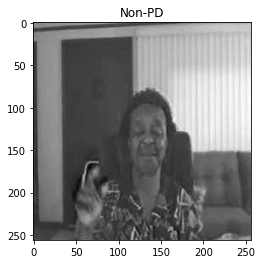

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()


plt.imshow(images[0].reshape(256,256), cmap='gray');

if labels[0].item():
    plt.title('PD');
else:
    plt.title('Non-PD')

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class CNN_Basic(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, stride=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 6, 3, stride=2)
        self.fc1 = nn.Linear(6 * 14 * 14, 568)
        self.fc2 = nn.Linear(568, 128)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x):
        x = x.reshape((-1,1,256,256)).float()
        x = self.conv1(x)
        x = self.pool(F.relu(x))
        x = self.conv2(x)
        x = self.pool(F.relu(x))
        #print(x.shape)
        x = self.conv3(x)
        #print(x.shape)
        x = x.view(-1, 6 * 14 * 14)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        y = torch.sigmoid(x)
        return y

model = CNN_Basic().float()
#images, labels = dataiter.next()
#y_pred = model(images)

In [8]:
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

In [9]:
for epoch in range(100):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels.reshape(-1,1).float())
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('[Epoch %d] loss: %.3f' %(epoch + 1, running_loss/len(train_dataset)))
    
print('Finished Training')

[Epoch 1] loss: 6.692
[Epoch 2] loss: 7.006
[Epoch 3] loss: 7.006
[Epoch 4] loss: 7.006
[Epoch 5] loss: 7.006
[Epoch 6] loss: 7.484
[Epoch 7] loss: 7.006
[Epoch 8] loss: 7.484
[Epoch 9] loss: 7.484
[Epoch 10] loss: 7.484
[Epoch 11] loss: 7.484
[Epoch 12] loss: 7.484
[Epoch 13] loss: 7.006
[Epoch 14] loss: 7.006
[Epoch 15] loss: 7.006
[Epoch 16] loss: 7.006
[Epoch 17] loss: 7.006
[Epoch 18] loss: 7.006
[Epoch 19] loss: 7.006
[Epoch 20] loss: 7.006
[Epoch 21] loss: 7.006
[Epoch 22] loss: 7.006
[Epoch 23] loss: 7.006
[Epoch 24] loss: 7.484
[Epoch 25] loss: 7.006
[Epoch 26] loss: 7.484
[Epoch 27] loss: 7.484
[Epoch 28] loss: 7.006
[Epoch 29] loss: 7.006
[Epoch 30] loss: 7.484
[Epoch 31] loss: 7.006
[Epoch 32] loss: 7.006
[Epoch 33] loss: 7.484
[Epoch 34] loss: 7.006
[Epoch 35] loss: 7.006
[Epoch 36] loss: 7.006
[Epoch 37] loss: 7.006
[Epoch 38] loss: 7.006
[Epoch 39] loss: 7.006
[Epoch 40] loss: 7.006
[Epoch 41] loss: 7.006
[Epoch 42] loss: 7.006
[Epoch 43] loss: 7.006
[Epoch 44] loss: 7.0

In [18]:
PATH = './cnn_raw_pixels.pth'
torch.save(model.state_dict(), PATH)

In [22]:
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        print(outputs.numpy().flatten())

[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0.

In [10]:
def evaluate(y, pred_y):
    performance = {}
    performance['keys'] = ['accuracy', 'auc-roc', 'f1', 'precision', 'recall', 'balanced_accuracy']
    performance['accuracy'] = accuracy_score(y, pred_y)
    performance['auc-roc'] = roc_auc_score(y, pred_y)
    performance['f1'] = f1_score(y, pred_y)
    performance['precision'] = precision_score(y, pred_y)
    performance['recall'] = recall_score(y, pred_y)
    performance['balanced_accuracy'] = balanced_accuracy_score(y, pred_y)
    
    return performance